In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2

import zipfile
from keras.optimizers import RMSprop
import os
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import Model
import warnings
warnings.filterwarnings('ignore')

In [11]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /content/Data/cats_and_dogs_filtered.zip

--2024-02-12 04:43:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.207, 172.217.214.207, 172.253.114.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/Data/cats_and_dogs_filtered.zip’

/content/Data/cats_ 100%[===================>]  65.43M   154MB/s    in 0.4s    

2024-02-12 04:43:20 (154 MB/s) - ‘/content/Data/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [12]:
local_zip = '/content/Data/cats_and_dogs_filtered.zip'
zipref = zipfile.ZipFile(local_zip)
zipref.extractall('/content/Data')

In [13]:
os.listdir('/content/Data/cats_and_dogs_filtered')

['validation', 'train', 'vectorize.py']

In [14]:
print(os.listdir('/content/Data/cats_and_dogs_filtered/train'))
print(os.listdir('/content/Data/cats_and_dogs_filtered/validation'))

['cats', 'dogs']
['cats', 'dogs']


In [28]:
base_dir = '/content/Data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [29]:
print('Number of training cat images   : ', len(os.listdir(train_cats_dir)))
print('Number of training dog images   : ', len(os.listdir(train_dogs_dir)))
print('Number of validation cat images : ', len(os.listdir(val_cats_dir)))
print('Number of validation dog images : ', len(os.listdir(val_dogs_dir)))

Number of training cat images   :  1000
Number of training dog images   :  1000
Number of validation cat images :  500
Number of validation dog images :  500


In [30]:
print(os.listdir(train_cats_dir)[:5])
print(os.listdir(train_dogs_dir)[:5])
print(os.listdir(val_cats_dir)[:5])
print(os.listdir(val_dogs_dir)[:5])

['cat.999.jpg', 'cat.440.jpg', 'cat.288.jpg', 'cat.103.jpg', 'cat.612.jpg']
['dog.0.jpg', 'dog.897.jpg', 'dog.387.jpg', 'dog.780.jpg', 'dog.462.jpg']
['cat.2309.jpg', 'cat.2049.jpg', 'cat.2256.jpg', 'cat.2107.jpg', 'cat.2422.jpg']
['dog.2324.jpg', 'dog.2044.jpg', 'dog.2278.jpg', 'dog.2079.jpg', 'dog.2129.jpg']


(-0.5, 448.5, 499.5, -0.5)

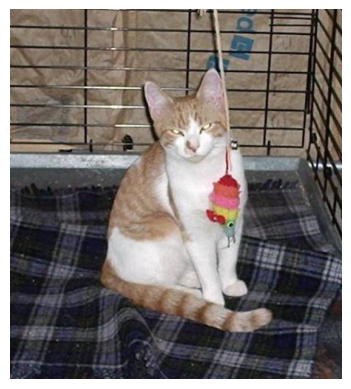

In [31]:
cat_image_path = os.path.join(train_cats_dir, 'cat.288.jpg')
cat_image = mpimg.imread(cat_image_path)
plt.imshow(cat_image)
plt.axis('off')

(-0.5, 499.5, 498.5, -0.5)

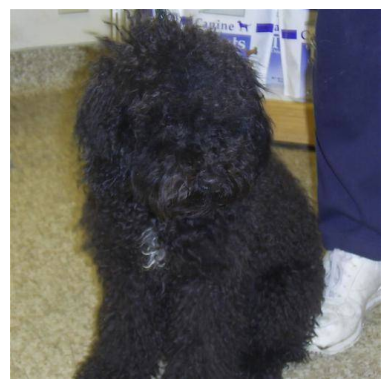

In [34]:
dog_image_path = os.path.join(train_dogs_dir, 'dog.207.jpg')
dog_image = mpimg.imread(dog_image_path)
plt.imshow(dog_image)
plt.axis('off')

In [69]:
cat_images = os.listdir(train_cats_dir)
dog_images = os.listdir(train_dogs_dir)

cat_image_paths = [os.path.join(train_cats_dir, image) for image in cat_images]
dog_image_paths = [os.path.join(train_dogs_dir, image) for image in dog_images]

print(len(cat_image_paths))
print(len(dog_image_paths))

image_paths = cat_image_paths + dog_image_paths
print(len(image_paths))

1000
1000
2000


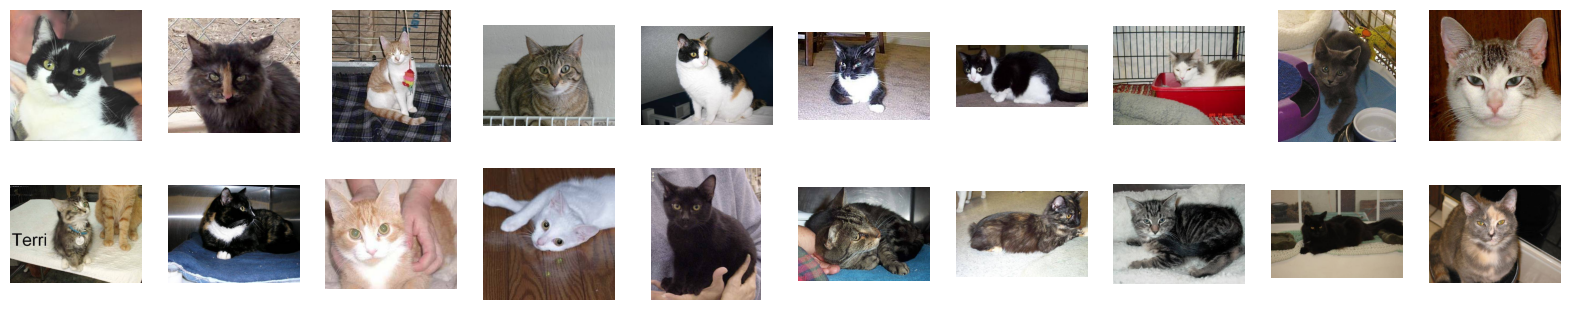

In [80]:
plt.figure(figsize = (20,12))
for i in range(20):
  plt.subplot(6,10, i+1)
  plt.axis('off')
  image = mpimg.imread(image_paths[i])
  plt.imshow(image)

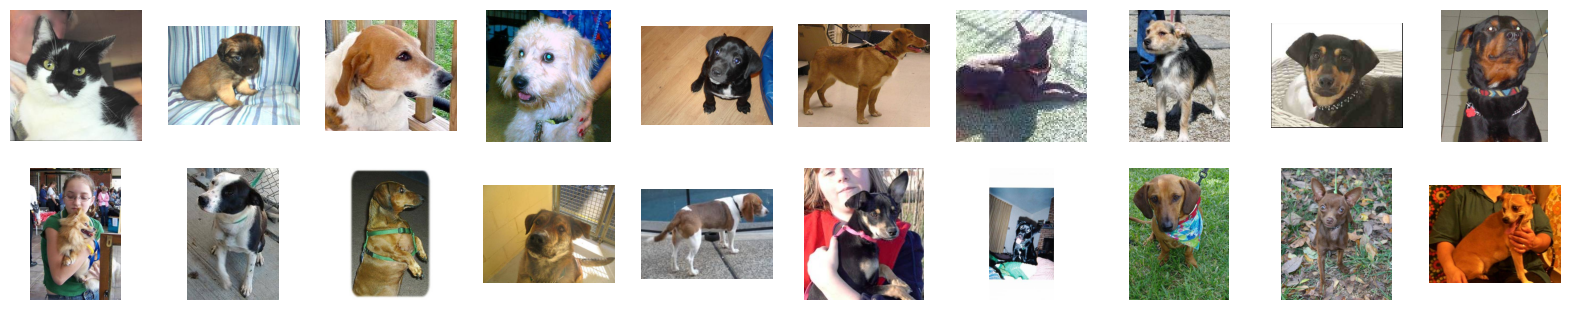

In [81]:
plt.figure(figsize = (20,12))
for i in range(20):
  plt.subplot(6,10, i+1)
  plt.axis('off')
  image = mpimg.imread(image_paths[-i])
  plt.imshow(image)

In [82]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    vertical_flip = True,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
      train_dir,
      batch_size = 40,
      class_mode = 'binary',
      target_size = (150,150)
)

Found 2000 images belonging to 2 classes.


In [83]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator =  val_datagen.flow_from_directory(
      val_dir,
      batch_size = 40,
      class_mode = 'binary',
      target_size = (150, 150)
)

Found 1000 images belonging to 2 classes.


In [45]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-02-12 04:49:39--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.207, 142.251.120.207, 142.251.161.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   278MB/s    in 0.3s    

2024-02-12 04:49:40 (278 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [46]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# InceptionV3 model
pre_trained_model = InceptionV3(
    input_shape = (150,150,3),
    include_top = False,
    weights = None
)
# Loading the weights
pre_trained_model.load_weights(local_weights_file)

In [47]:
for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [72]:
last_layer = pre_trained_model.get_layer('mixed9')
print('Last Layer Output_shape : ', last_layer.output_shape)
last_output = last_layer.output

Last Layer Output_shape :  (None, 3, 3, 2048)


In [73]:
x = Flatten()(last_output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation = 'sigmoid')(x)

final_model = Model(pre_trained_model.input, x)

In [74]:
final_model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [76]:
history = final_model.fit(
    train_generator,
    validation_data = (val_generator),
    epochs = 20,
    verbose = 1
)

Epoch 1/20
50/50 [==============================] - 15s 302ms/step - loss: 0.2207 - accuracy: 0.9185 - val_loss: 0.1092 - val_accuracy: 0.9550
Epoch 2/20
50/50 [==============================] - 15s 303ms/step - loss: 0.2251 - accuracy: 0.9160 - val_loss: 0.1592 - val_accuracy: 0.9490
Epoch 3/20
50/50 [==============================] - 16s 320ms/step - loss: 0.1792 - accuracy: 0.9330 - val_loss: 0.0824 - val_accuracy: 0.9630
Epoch 4/20
50/50 [==============================] - 15s 303ms/step - loss: 0.1683 - accuracy: 0.9420 - val_loss: 0.2344 - val_accuracy: 0.9370
Epoch 5/20
50/50 [==============================] - 15s 302ms/step - loss: 0.1640 - accuracy: 0.9355 - val_loss: 0.0959 - val_accuracy: 0.9680
Epoch 6/20
50/50 [==============================] - 15s 302ms/step - loss: 0.1573 - accuracy: 0.9465 - val_loss: 0.1017 - val_accuracy: 0.9600
Epoch 7/20
50/50 [==============================] - 15s 300ms/step - loss: 0.1410 - accuracy: 0.9475 - val_loss: 0.1152 - val_accuracy: 0.9630

In [95]:
print(os.listdir(train_cats_dir)[:5])
print(os.listdir(train_dogs_dir)[:5])
print(os.listdir(val_cats_dir)[:5])
print(os.listdir(val_dogs_dir)[:5])

['cat.999.jpg', 'cat.440.jpg', 'cat.288.jpg', 'cat.103.jpg', 'cat.612.jpg']
['dog.0.jpg', 'dog.897.jpg', 'dog.387.jpg', 'dog.780.jpg', 'dog.462.jpg']
['cat.2309.jpg', 'cat.2049.jpg', 'cat.2256.jpg', 'cat.2107.jpg', 'cat.2422.jpg']
['dog.2324.jpg', 'dog.2044.jpg', 'dog.2278.jpg', 'dog.2079.jpg', 'dog.2129.jpg']


(-0.5, 149.5, 149.5, -0.5)

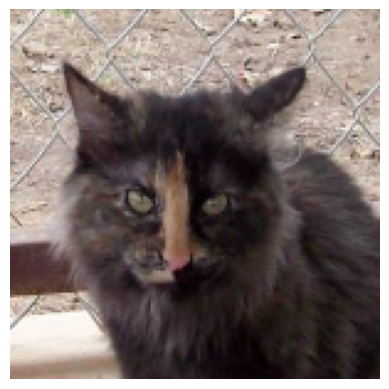

In [103]:
image_path = os.path.join(train_cats_dir, 'cat.440.jpg')
image = mpimg.imread(image_path)
image = cv2.resize(image, (150,150))
plt.imshow(image)
plt.axis('off')

In [104]:
final_model.predict(image.reshape(1,150,150,3))

1/1 [==============================] - 0s 25ms/step


array([[0.]], dtype=float32)

(-0.5, 149.5, 149.5, -0.5)

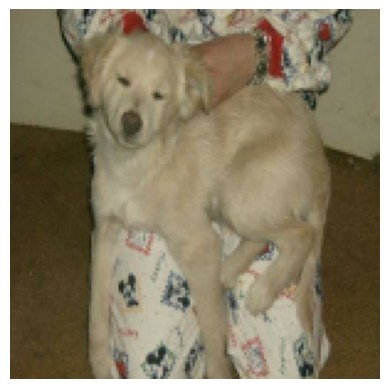

In [111]:
image_path = os.path.join(train_dogs_dir, 'dog.780.jpg')
image = mpimg.imread(image_path)
image = cv2.resize(image, (150,150))
plt.imshow(image)
plt.axis('off')

In [112]:
final_model.predict(image.reshape(1,150,150,3))

1/1 [==============================] - 0s 26ms/step


array([[1.]], dtype=float32)